<a href="https://colab.research.google.com/github/Muhammad-Ahmad-Jutt/Intro_to_tensoflow_deep_learning/blob/main/Training_a_model_to_identy_clothings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_datasets

In [2]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [3]:
from sys import meta_path
dataset,metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.VFKTE7_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.VFKTE7_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
num_of_train_examples = metadata.splits['train'].num_examples
num_of_test_examples = metadata.splits['test'].num_examples
print(f"num of train examples are {num_of_train_examples} and number of test examples are {num_of_test_examples}")

num of train examples are 60000 and number of test examples are 10000


In [11]:
def normalize_image(image, label):
  image = tf.cast(image, tf.float32)
  image/=255
  return image, label

train_dataset = train_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)

In [12]:
batch_size = 32
train_dataset = train_dataset.repeat().shuffle(num_of_train_examples).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

creating layers

In [18]:
l0 = tf.keras.layers.Flatten(input_shape=(28,28,1))
l1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
l2 = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_of_train_examples/batch_size))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7854 - loss: 0.6226
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8614 - loss: 0.3861
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8749 - loss: 0.3407
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8844 - loss: 0.3167
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8893 - loss: 0.2997


In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_of_test_examples/32))
print(f"Accuracy on test dataset is {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8732 - loss: 0.3438
Accuracy on test dataset is 0.8730999827384949


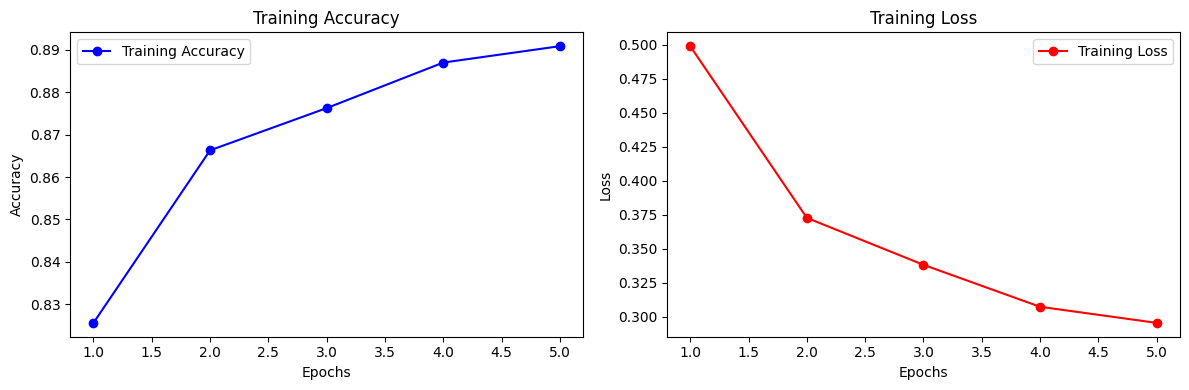

In [20]:
#  Plotting training accuracy and loss
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()